### Clasificación multiclase

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [33]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Valores faltantes

In [34]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [35]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

numeric_cols  = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

df[numeric_cols] = IterativeImputer(random_state=42).fit_transform(df[numeric_cols])

df[categorical_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[categorical_cols])

df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Codificar categóricos

* species
* island
* sex

LabelEncoder y OneHotEncoder

In [36]:
X = df.drop('species', axis=1)
y = df['species']


### Codificar la entrada con OneHotEncoder
Para la entrada(X) se utiliza pd.get_dummies o OneHotEncoder,
se genera nuevas columnas para cada valor categórico.

In [37]:
from sklearn.preprocessing import OneHotEncoder

categoricals =df[['island', 'sex']]
onehot_encoder = OneHotEncoder(drop='first',sparse=False)
categorials_encoded = onehot_encoder.fit_transform(categoricals)

column_names = onehot_encoder.get_feature_names_out(categoricals.columns)

df_categoricals = pd.DataFrame(categorials_encoded, columns=column_names)
df_categoricals.head(2)

c:\Users\bardo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,island_Dream,island_Torgersen,sex_Male
0,0.0,1.0,1.0
1,0.0,1.0,0.0


In [38]:
df = pd.concat([df, df_categoricals], axis=1)
df.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen,sex_Male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.0,1.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.0,1.0,0.0


### Codificar salida (y) con LabelEncoder

Equivalente a .map() de pandas

En una misma culumna genera los valores numéricos por cada valor categórico

In [39]:
from sklearn.preprocessing import LabelEncoder

y = df['species']

label_encoder = LabelEncoder()
df['species_int'] = label_encoder.fit_transform(df['species'])
df.head(2)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen,sex_Male,species_int
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.0,1.0,1.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.0,1.0,0.0,0


## EDAs


<Axes: xlabel='body_mass_g', ylabel='bill_length_mm'>

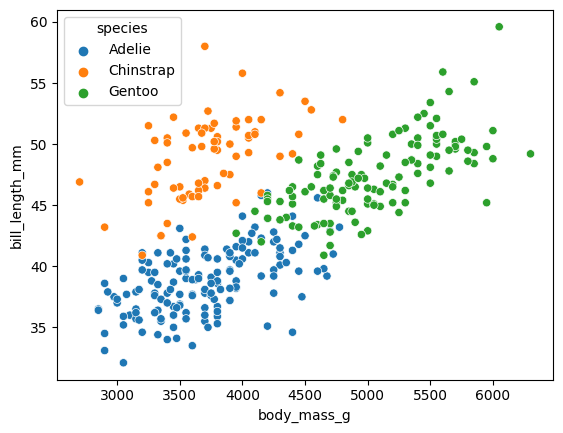

In [41]:
sns.scatterplot(data= df, x='body_mass_g', y='bill_length_mm', hue='species')

<Axes: >

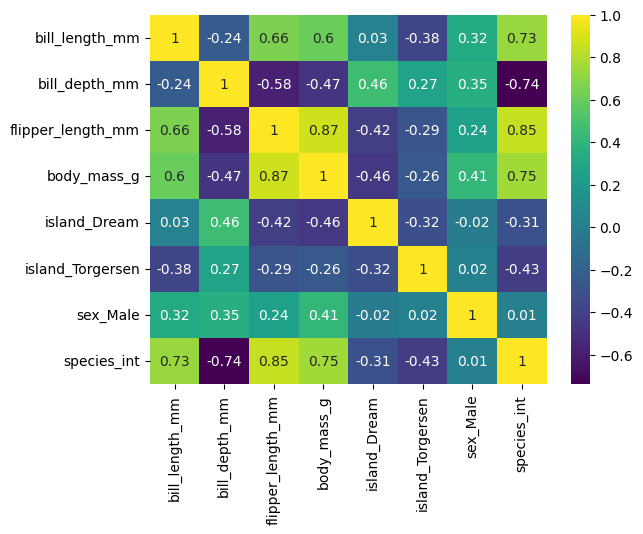

In [61]:
df_corr = df.corr(numeric_only=True).round(2)
sns.heatmap(df_corr, cmap='viridis', annot=True)

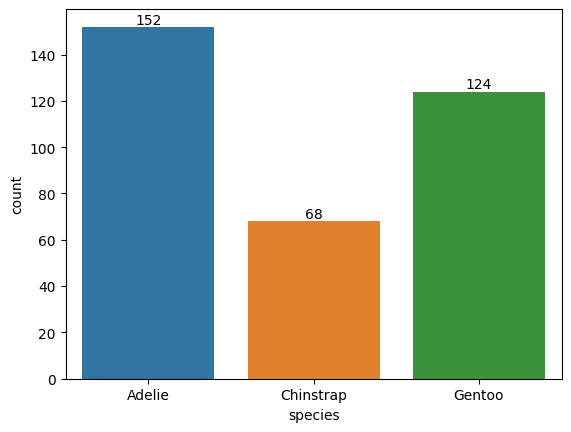

In [42]:
ax = sns.countplot(data=df, x='species')
ax.bar_label(ax.containers[0]);

### Particionamiento datos

In [43]:
X = df.drop(['species', 'island', 'sex'], axis=1)
y = df['species_int']

## Modelado

#### Regresión logística

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        21

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



c:\Users\bardo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## KNeighborsClassifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.71      0.62      0.67        16
           2       0.86      0.86      0.86        21

    accuracy                           0.81        69
   macro avg       0.80      0.79      0.79        69
weighted avg       0.81      0.81      0.81        69



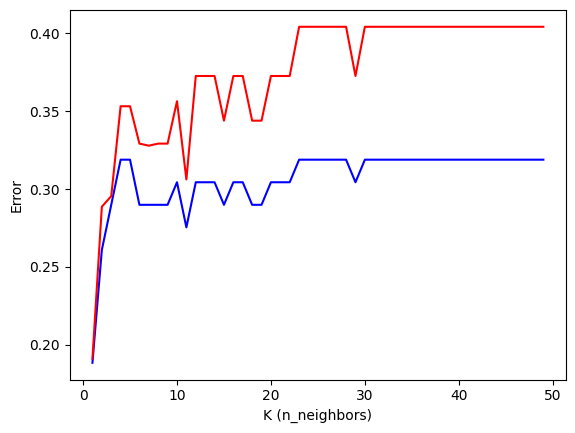

In [50]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_error = []
f1_error = []

for k in range(1, 50): # itera los números impares
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    error = 1 - accuracy
    accuracy_error.append(error)

    f1 = f1_score(y_test, y_pred, average='weighted') # Clasificación multiclase requiere parámetro average
    error = 1 - f1
    f1_error.append(error)

plt.plot(range(1, 50), accuracy_error, c='b')
plt.plot(range(1, 50), f1_error, c='r')

plt.ylabel('Error')
plt.xlabel('K (n_neighbors)');

## SVC


In [54]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.88      0.72        32
           1       0.00      0.00      0.00        16
           2       0.83      0.90      0.86        21

    accuracy                           0.68        69
   macro avg       0.48      0.59      0.53        69
weighted avg       0.53      0.68      0.60        69



c:\Users\bardo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bardo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bardo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## Escalado MinMaxScaler


In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[0.12363636, 0.36904762, 0.38983051, ..., 0.        , 0.        ,
        0.        ],
       [0.53454545, 0.27380952, 0.72881356, ..., 0.        , 1.        ,
        1.        ],
       [0.25818182, 0.77380952, 0.38983051, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.23636364, 0.48809524, 0.45762712, ..., 0.        , 0.        ,
        0.        ],
       [0.52727273, 0.13095238, 0.6440678 , ..., 0.        , 0.        ,
        1.        ],
       [0.20363636, 0.3452381 , 0.18644068, ..., 0.        , 0.        ,
        0.        ]])

In [56]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        21

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



c:\Users\bardo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        21

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



In [60]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        21

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

